In [1]:
# General libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Scripts
import utils

pd.set_option("display.precision", 10)
pd.set_option("display.max_columns", 500)

%matplotlib inline

In [2]:
DATA_PATH = "data/6_months"
MODEL_PATH = "models/" + DATA_PATH.split("/")[-1]

In [14]:
df = pd.read_csv(f"{DATA_PATH}/data_reduced_noisy.csv", index_col=0)
df

,Electricity.Timestep,Time,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine,Power
0,0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000230970
1,1,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000269284
2,2,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000253307
3,3,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000237392
4,4,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000221426
...,...,...,...,...,...,...,...,...
15638395,15638395,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000450566
15638396,15638396,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000462342
15638397,15638397,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000452220
15638398,15638398,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000417102


<AxesSubplot:>

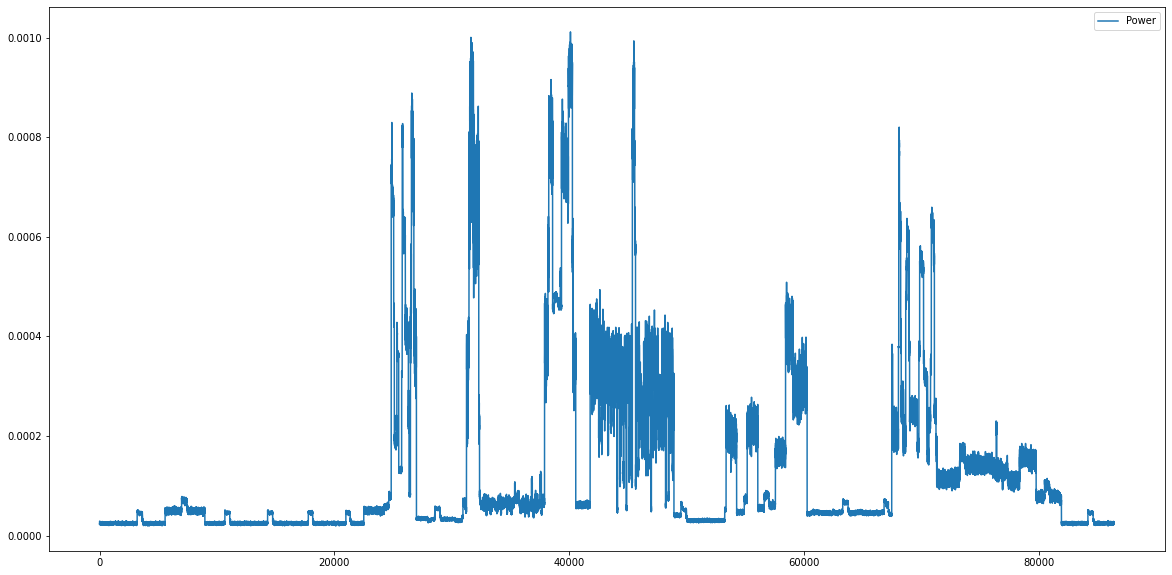

In [4]:
df.iloc[:86400].plot(y="Power", figsize=(20, 10))

## Create windowed data if necessary

In [24]:
df_last_month = df.iloc[int(len(df) * (5 / 6)) : len(df)].copy()
df_last_month = df_last_month.reset_index()
df_last_month

,index,Electricity.Timestep,Time,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine,Power
0,13032000,13032000,2021-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0001567047
1,13032001,13032001,2021-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0001387678
2,13032002,13032002,2021-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0001570701
3,13032003,13032003,2021-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0001525167
4,13032004,13032004,2021-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0001582124
...,...,...,...,...,...,...,...,...,...
2606395,15638395,15638395,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000450566
2606396,15638396,15638396,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000462342
2606397,15638397,15638397,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000452220
2606398,15638398,15638398,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000417102


In [25]:
window_size = 180
step = 1
appliances = ["Stove", "Coffee_machine", "Microwave", "Dishwasher", "Washing_machine"]
windowed_data_path = f"{DATA_PATH}/windowed_{window_size}_step_{step}.csv"

In [26]:
df_timeseries = utils.write_or_load_windows(
    windowed_data_path, df_last_month, window_size, step, appliances
)
df_timeseries

Window file not found, creating a new one for window size 180 and step size 1
Step 0 with array size 2606400
Step 10000 with array size 2606400
Step 20000 with array size 2606400
Step 30000 with array size 2606400
Step 40000 with array size 2606400
Step 50000 with array size 2606400
Step 60000 with array size 2606400
Step 70000 with array size 2606400
Step 80000 with array size 2606400
Step 90000 with array size 2606400
Step 100000 with array size 2606400
Step 110000 with array size 2606400
Step 120000 with array size 2606400
Step 130000 with array size 2606400
Step 140000 with array size 2606400
Step 150000 with array size 2606400
Step 160000 with array size 2606400
Step 170000 with array size 2606400
Step 180000 with array size 2606400
Step 190000 with array size 2606400
Step 200000 with array size 2606400
Step 210000 with array size 2606400
Step 220000 with array size 2606400
Step 230000 with array size 2606400
Step 240000 with array size 2606400
Step 250000 with array size 2606400


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19,sample_20,sample_21,sample_22,sample_23,sample_24,sample_25,sample_26,sample_27,sample_28,sample_29,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39,sample_40,sample_41,sample_42,sample_43,sample_44,sample_45,sample_46,sample_47,sample_48,sample_49,sample_50,sample_51,sample_52,sample_53,sample_54,sample_55,sample_56,sample_57,sample_58,sample_59,sample_60,sample_61,sample_62,sample_63,sample_64,sample_65,sample_66,sample_67,sample_68,sample_69,sample_70,sample_71,sample_72,sample_73,sample_74,sample_75,sample_76,sample_77,sample_78,sample_79,sample_80,sample_81,sample_82,sample_83,sample_84,sample_85,sample_86,sample_87,sample_88,sample_89,sample_90,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,sample_100,sample_101,sample_102,sample_103,sample_104,sample_105,sample_106,sample_107,sample_108,sample_109,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118,sample_119,sample_120,sample_121,sample_122,sample_123,sample_124,sample_125,sample_126,sample_127,sample_128,sample_129,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139,sample_140,sample_141,sample_142,sample_143,sample_144,sample_145,sample_146,sample_147,sample_148,sample_149,sample_150,sample_151,sample_152,sample_153,sample_154,sample_155,sample_156,sample_157,sample_158,sample_159,sample_160,sample_161,sample_162,sample_163,sample_164,sample_165,sample_166,sample_167,sample_168,sample_169,sample_170,sample_171,sample_172,sample_173,sample_174,sample_175,sample_176,sample_177,sample_178,sample_179,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine
0,0.0001567047,0.0001387678,0.0001570701,0.0001525167,0.0001582124,0.0001363594,0.0001502016,0.0001524143,0.0001433487,0.0001599655,0.0001496477,0.0001550041,0.0001477059,0.0001462401,0.0001441854,0.0001484884,0.0001509225,0.0001599853,0.0001473093,0.0001455594,0.0001617919,0.0001459716,0.0001523487,0.0001484821,0.0001380473,0.0001502253,0.0001517571,0.0001573660,0.0001586774,0.0001377296,0.0001396824,0.0001418023,0.0001519152,0.0001604267,0.0001485330,0.0001453387,0.0001598725,0.0001496837,0.0001537660,0.0001357789,0.0001529094,0.0001514478,0.0001554339,0.0001562052,0.0001525792,0.0001392569,0.0001384204,0.0001432295,0.0001434882,0.0001396081,0.0001375167,0.0001530931,0.0001387494,0.0001622797,0.0001546164,0.0001497845,0.0001528894,0.0001494679,0.0001522063,0.0001457176,0.0001460168,0.0001414556,0.0001460309,0.0001465982,0.0001447985,0.0001639070,0.0001328957,0.0001519047,0.0001398323,0.0001590326,0.0001514081,0.0001529710,0.0001351505,0.0001478810,0.0001428016,0.0001473621,0.0001448259,0.0001506248,0.0001442177,0.0001488766,0.0001504755,0.0001541620,0.0001495985,0.0001552328,0.0001437602,0.0001449125,0.0001461283,0.0001600534,0.0001423270,0.0001381453,0.0001671616,0.0001470570,0.0001480087,0.0001534178,0.0001492486,0.0001351401,0.0001442496,0.0001489050,0.0001325454,0.0001488421,0.0001400687,0.0001435467,0.0001567003,0.0001596137,0.0001479796,0.0001445594,0.0001491363,0.0001454473,0.0001548101,0.0001414508,0.0001343948,0.0001456909,0.0001399058,0.0001557608,0.0001504713,0.0001472402,0.0001394553,0.0001523024,0.0001518415,0.0001361274,0.0001485977,0.0001379649,0.0001441583,0.0001482136,0.0001355378,0.0001546165,0.0001394558,0.0001587925,0.0001598724,0.0001473018,0.0001499426,0.0001482724,0.0001462232,0.0001441178,0.0001472607,0.0001405876,0.0001454499,0.0001411768,0.0001459480,0.0001391442,0.0001424453,0.0001386773,0.0001334870,0.0001477652,0.0001462036,0.0001455096,0.0001565148,0.0001584786,0.0001462157,0.0001542855,0.0001566466,0.0001514815,0.0001464976,0.0001465478,0.0001352764,0.0001516162,0.0001488211,0.0001377643,0.0001548558,0.

## Train test split (has to be identical to training for noisy dataset)

In [9]:
samples = [x for i, x in enumerate(df_timeseries.columns) if x not in appliances]
X = df_timeseries.loc[:, samples]
y = df_timeseries.loc[:, appliances]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42, shuffle=True
)

In [12]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

## Load model under test

In [31]:
MODEL_NAME = "DLO_256,256,512,512,512,512_90er_kernel_GlobalMaxPool_model_noisy"
LR = 6e-07
EPOCHS = 45
BATCH_SIZE = 512

In [33]:
model = tf.keras.models.load_model(
    f"models/test/{MODEL_NAME}/LR={LR},Epochs={EPOCHS},BATCH={BATCH_SIZE}"
)

In [34]:
# the exact configuration of the model
# model.get_config()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 180, 256)          23296     
                                                                 
 re_lu (ReLU)                (None, 180, 256)          0         
                                                                 
 batch_normalization (BatchN  (None, 180, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 256)           589849

In [13]:
THRESHOLD = 0.5
y_pred = model.predict(X_test)
y_pred[y_pred >= THRESHOLD] = 1
y_pred[y_pred < THRESHOLD] = 0
y_pred

1609/1609 [==============================] - 41s 23ms/step


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
test_loss, test_auc, test_acc = model.evaluate(X_test, y_test)

print("Test AUC", test_auc)
print("Test Acc", test_acc)
print("Test loss", test_loss)

1609/1609 [==============================] - 43s 26ms/step - loss: 0.8387 - auc: 0.6930 - binary_accuracy: 0.8152
Test AUC 0.6930416822433472
Test Acc 0.8151618242263794
Test loss 0.8386948704719543


In [15]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, y_pred)

print(
    classification_report(y_test, y_pred, target_names=appliances, zero_division=False)
)

                 precision    recall  f1-score   support

          Stove       0.78      0.53      0.63     18565
 Coffee_machine       0.84      0.09      0.17      3135
      Microwave       0.97      0.26      0.41      3834
     Dishwasher       0.76      0.21      0.33     25408
Washing_machine       0.90      0.08      0.15      9381

      micro avg       0.79      0.29      0.42     60323
      macro avg       0.85      0.24      0.34     60323
   weighted avg       0.81      0.29      0.39     60323
    samples avg       0.29      0.27      0.27     60323



Accuracy: 0.7782634881778089


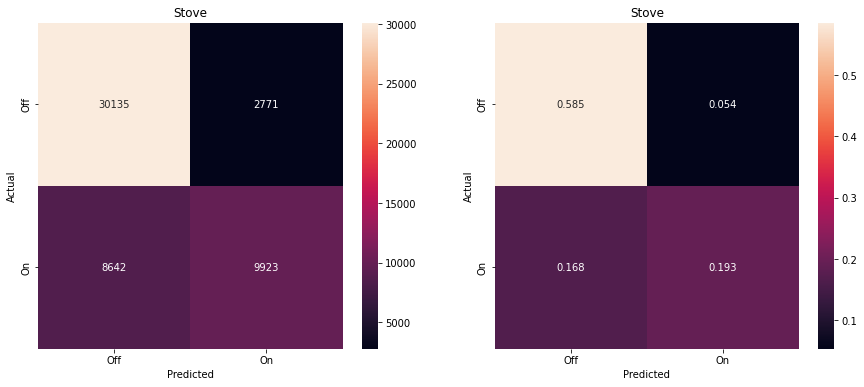

Accuracy: 0.9436575935963941


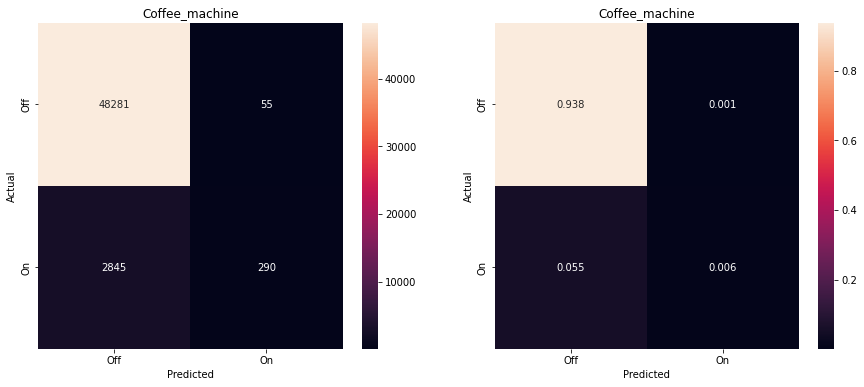

Accuracy: 0.9443764449884401


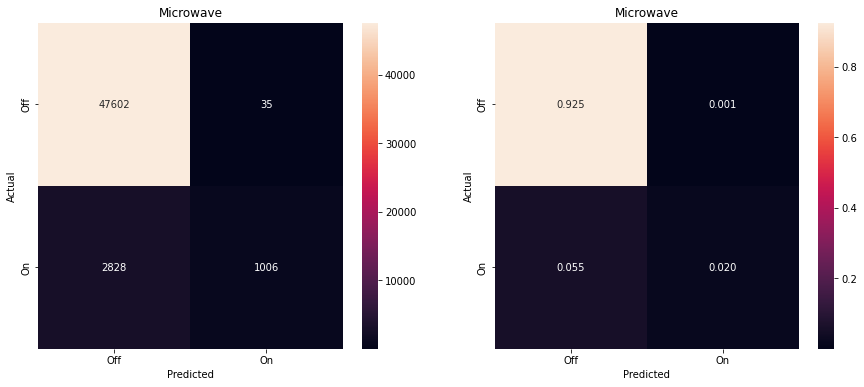

Accuracy: 0.5782090886130054


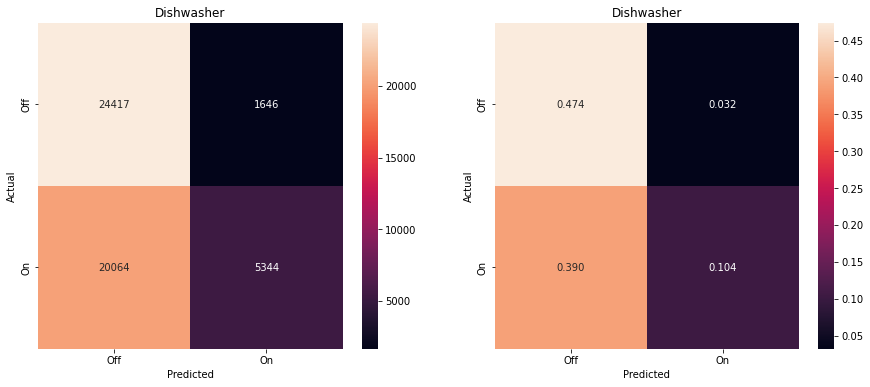

Accuracy: 0.8313030638612035


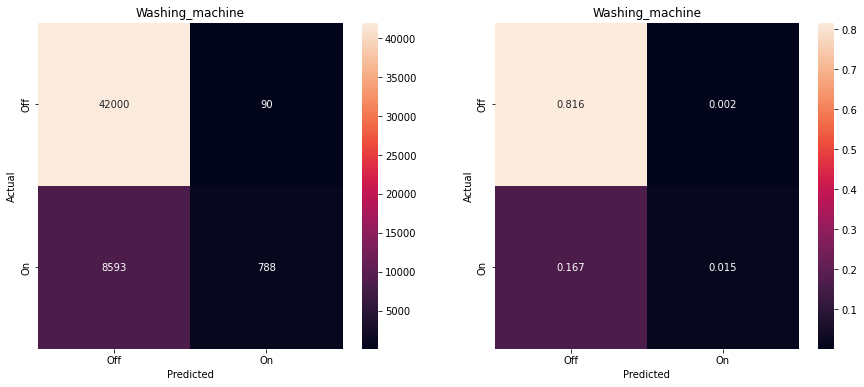

In [16]:
columns = ["Off", "On"]
for idx, item in enumerate(mcm):
    tn, fp, fn, tp = item.ravel()
    print(f"Accuracy: {(tp+tn)/(tn+fp+fn+tp)}")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    heat = sns.heatmap(
        item, annot=True, fmt="1", xticklabels=columns, yticklabels=columns, ax=ax1
    )
    norm_item = item.astype("float") / item.sum(axis=None)
    norm_heat = sns.heatmap(
        norm_item,
        annot=True,
        fmt=".3f",
        xticklabels=columns,
        yticklabels=columns,
        ax=ax2,
    )
    for ax in [ax1, ax2]:
        ax.set_title(appliances[idx])
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    plt.show()

## Try on randomly sampled data from large dataset

In [17]:
DATA_PATH = "data/6_months"

In [18]:
df_6m_sum = pd.read_csv(f"{DATA_PATH}/data_reduced_noisy.csv", index_col=0)
df_6m_sum

,Electricity.Timestep,Time,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine,Power
0,0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000230970
1,1,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000269284
2,2,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000253307
3,3,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000237392
4,4,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0000221426
...,...,...,...,...,...,...,...,...
15638395,15638395,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000450566
15638396,15638396,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000462342
15638397,15638397,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000452220
15638398,15638398,2021-06-30 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0000417102


In [27]:
df_6m_sampled = df_timeseries.sample(n=200_000)
df_6m_sampled

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19,sample_20,sample_21,sample_22,sample_23,sample_24,sample_25,sample_26,sample_27,sample_28,sample_29,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39,sample_40,sample_41,sample_42,sample_43,sample_44,sample_45,sample_46,sample_47,sample_48,sample_49,sample_50,sample_51,sample_52,sample_53,sample_54,sample_55,sample_56,sample_57,sample_58,sample_59,sample_60,sample_61,sample_62,sample_63,sample_64,sample_65,sample_66,sample_67,sample_68,sample_69,sample_70,sample_71,sample_72,sample_73,sample_74,sample_75,sample_76,sample_77,sample_78,sample_79,sample_80,sample_81,sample_82,sample_83,sample_84,sample_85,sample_86,sample_87,sample_88,sample_89,sample_90,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,sample_100,sample_101,sample_102,sample_103,sample_104,sample_105,sample_106,sample_107,sample_108,sample_109,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118,sample_119,sample_120,sample_121,sample_122,sample_123,sample_124,sample_125,sample_126,sample_127,sample_128,sample_129,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139,sample_140,sample_141,sample_142,sample_143,sample_144,sample_145,sample_146,sample_147,sample_148,sample_149,sample_150,sample_151,sample_152,sample_153,sample_154,sample_155,sample_156,sample_157,sample_158,sample_159,sample_160,sample_161,sample_162,sample_163,sample_164,sample_165,sample_166,sample_167,sample_168,sample_169,sample_170,sample_171,sample_172,sample_173,sample_174,sample_175,sample_176,sample_177,sample_178,sample_179,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine
2022252,0.0000462862,0.0000540021,0.0000498259,0.0000471960,0.0000485023,0.0000520648,0.0000451198,0.0000514287,0.0000496602,0.0000473327,0.0000528594,0.0000519410,0.0000477571,0.0000472737,0.0000519521,0.0000424216,0.0000535093,0.0000465160,0.0000544015,0.0000445957,0.0000501261,0.0000438758,0.0000516833,0.0000512368,0.0000505197,0.0000516200,0.0000502545,0.0000495139,0.0000481439,0.0000503497,0.0000471716,0.0000462619,0.0000492002,0.0000496129,0.0000529187,0.0000524062,0.0000527859,0.0000478792,0.0000469620,0.0000545838,0.0000491920,0.0000528832,0.0000511225,0.0000478421,0.0000504338,0.0000479272,0.0000505967,0.0000470251,0.0000456513,0.0000490499,0.0000520971,0.0000517143,0.0000497178,0.0000453025,0.0000496856,0.0000498656,0.0000514035,0.0000512772,0.0000441533,0.0000534667,0.0000505540,0.0000485541,0.0000521931,0.0000429353,0.0000491330,0.0000456100,0.0000507591,0.0000544544,0.0000459034,0.0000525700,0.0000503237,0.0000505336,0.0000499092,0.0000513457,0.0000487595,0.0000500175,0.0000453332,0.0000504986,0.0000477241,0.0000505049,0.0000482838,0.0000557039,0.0000497023,0.0000480734,0.0000471469,0.0000509990,0.0000476895,0.0000497358,0.0000513636,0.0000469673,0.0000508251,0.0000495407,0.0000517377,0.0000469705,0.0000437832,0.0000475282,0.0000525208,0.0000561113,0.0000407403,0.0000472822,0.0000489840,0.0000505341,0.0000465011,0.0000482752,0.0000494934,0.0000518236,0.0000466272,0.0000477336,0.0000533730,0.0000494433,0.0000482871,0.0000527948,0.0000478400,0.0000468701,0.0000509672,0.0000469712,0.0000432588,0.0000489235,0.0000497742,0.0000440329,0.0000453073,0.0000500722,0.0000478019,0.0000538729,0.0000496740,0.0000466553,0.0000525345,0.0000479420,0.0000482697,0.0000485523,0.0000495759,0.0000467461,0.0000552044,0.0000494831,0.0000491575,0.0000517035,0.0000504891,0.0000521250,0.0000510866,0.0000474321,0.0000492146,0.0000561699,0.0000476112,0.0000461145,0.0000506687,0.0000544087,0.0000507642,0.0000485635,0.0000498895,0.0000475422,0.0000497537,0.0000503945,0.0000517691,0.0000489842,0.0000528157,0.0000558764,0.0000486766,0.0000518206,0.0000591

In [29]:
samples_6m = [x for i, x in enumerate(df_timeseries.columns) if x not in appliances]
X_6m = df_timeseries.loc[:, samples_6m]
y_6m = df_timeseries.loc[:, appliances]

In [35]:
THRESHOLD = 0.5
y_pred = model.predict(X_6m)
y_pred[y_pred >= THRESHOLD] = 1
y_pred[y_pred < THRESHOLD] = 0
y_pred


81445/81445 [==============================] - 2010s 25ms/step


In [37]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_6m, y_pred)

print(classification_report(y_6m, y_pred, target_names=appliances, zero_division=False))

                 precision    recall  f1-score   support

          Stove       0.80      0.82      0.81    178021
 Coffee_machine       0.84      0.76      0.80     35674
      Microwave       0.62      0.56      0.59     49561
     Dishwasher       0.57      0.23      0.33    292795
Washing_machine       0.66      0.40      0.50    109558

      micro avg       0.70      0.47      0.56    665609
      macro avg       0.70      0.55      0.60    665609
   weighted avg       0.66      0.47      0.53    665609
    samples avg       0.11      0.10      0.10    665609



Accuracy: 0.9737696841518813


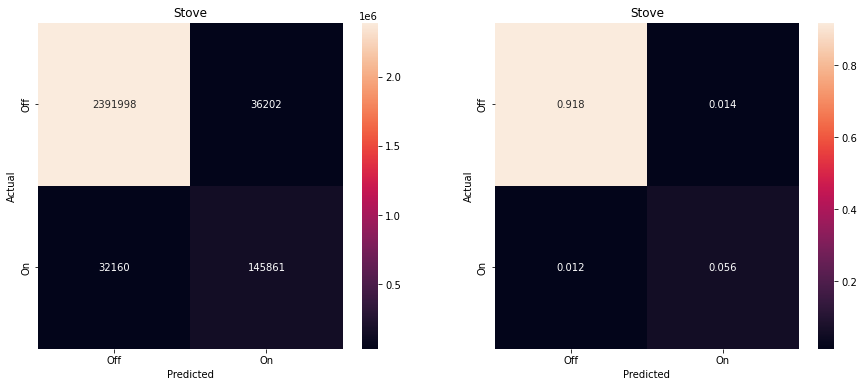

Accuracy: 0.9948101101172925


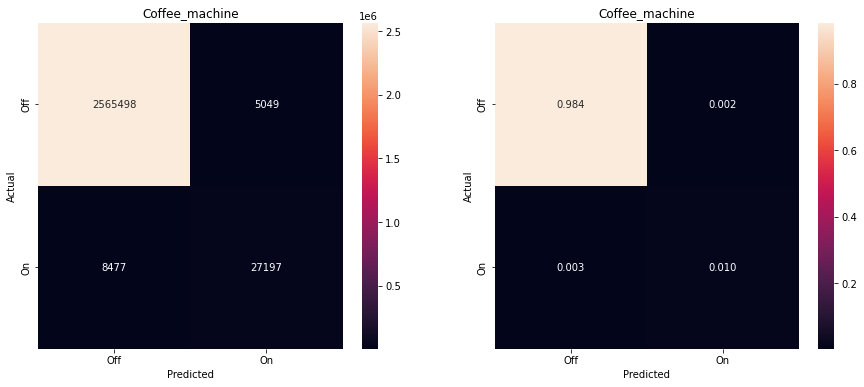

Accuracy: 0.985220363123465


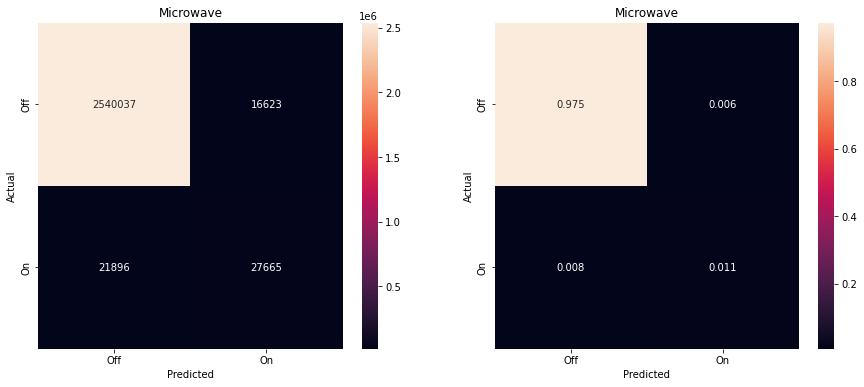

Accuracy: 0.8937077861010252


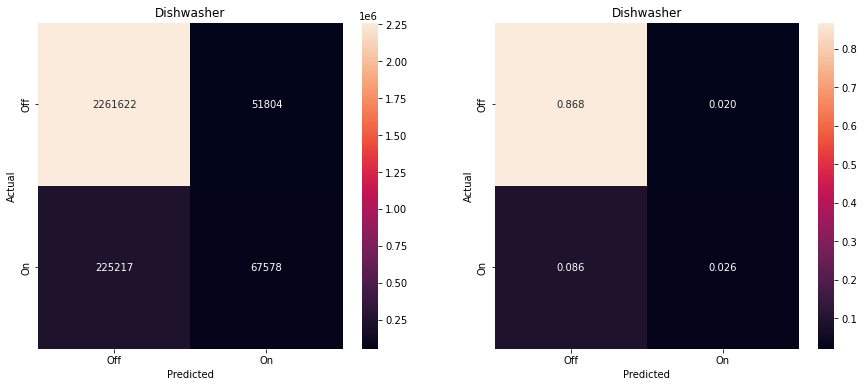

Accuracy: 0.9660727160129552


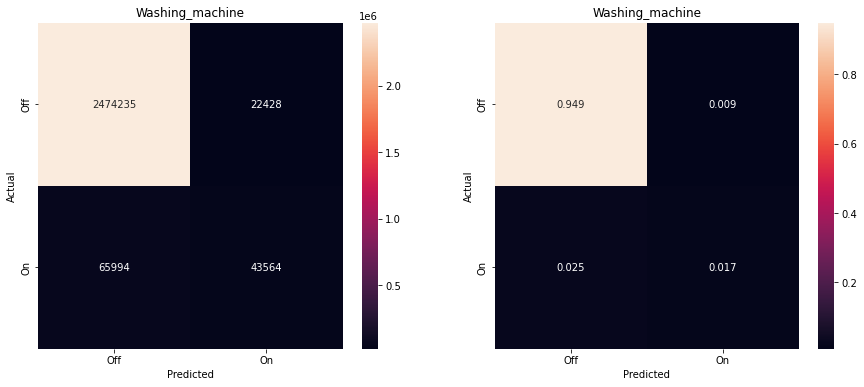

In [38]:
columns = ["Off", "On"]
for idx, item in enumerate(mcm):
    tn, fp, fn, tp = item.ravel()
    print(f"Accuracy: {(tp+tn)/(tn+fp+fn+tp)}")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    heat = sns.heatmap(
        item, annot=True, fmt="1", xticklabels=columns, yticklabels=columns, ax=ax1
    )
    norm_item = item.astype("float") / item.sum(axis=None)
    norm_heat = sns.heatmap(
        norm_item,
        annot=True,
        fmt=".3f",
        xticklabels=columns,
        yticklabels=columns,
        ax=ax2,
    )
    for ax in [ax1, ax2]:
        ax.set_title(appliances[idx])
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    plt.show()